In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

In [10]:
os.getcwd()

'C:\\Users\\minec\\JuProjects\\SuyGiamQuaVatLieu'

In [11]:
dataPb = pd.read_excel('dataPb.xlsx')
dataAl = pd.read_excel('dataAl.xlsx')

d(mm), Counts(Count/s),
t = 120 (s),
R_0 = 145.255 (Count/s)



Data Counts Of Pb

In [12]:
display(dataPb)

,d,Counts,Background Counts
0,5,3.372,0.372
1,10,2.522,0.372
2,20,1.456,0.372
3,30,1.211,0.372


Data Count Of Al

In [13]:
display(dataAl)

,d,Counts,Background Counts
0,5,3.983,0.372
1,10,3.817,0.372
2,20,3.639,0.372
3,30,3.261,0.372


In [16]:
# Var Pb
cpb = (dataPb["Counts"][0:4])
bcpb = (dataPb["Background Counts"][0:4])

# Var Al
cal = (dataAl["Counts"][0:4])
bcal = (dataAl["Background Counts"][0:4])

# Real Counts Pb
rpb = cpb - bcpb
# Real Counts Al
ral = cal - bcal

In [22]:
dataPb.loc[:, ["Real Counts"]] = rpb
dataAl.loc[:, ["Real Counts"]] = ral

In [23]:
print("Data of Pb")
display(dataPb)

Data of Pb


,d,Counts,Background Counts,Real Counts
0,5,3.372,0.372,3.000
1,10,2.522,0.372,2.150
2,20,1.456,0.372,1.084
3,30,1.211,0.372,0.839


In [24]:
print("Data of Al")
display(dataAl)

Data of Al


,d,Counts,Background Counts,Real Counts
0,5,3.983,0.372,3.611
1,10,3.817,0.372,3.445
2,20,3.639,0.372,3.267
3,30,3.261,0.372,2.889


In [56]:
# R0
R0 = 145.255

# Pb
y1 = np.array(dataPb["Real Counts"][0:4])
y1ln = np.array(np.log(R0/y1))
# Al
y2 = np.array(dataAl["Real Counts"][0:4])
y2ln = np.array(np.log(R0/y2))

# d same all
x = np.array(dataAl["d"][0:4])


print(y1)
print(y1ln)
print(y2)
print(y2ln)
print(x)

[3.    2.15  1.084 0.839]
[3.87987853 4.21302298 4.89783292 5.15403539]
[3.611 3.445 3.267 2.889]
[3.69450608 3.74156691 3.79461869 3.9175804 ]
[ 5 10 20 30]


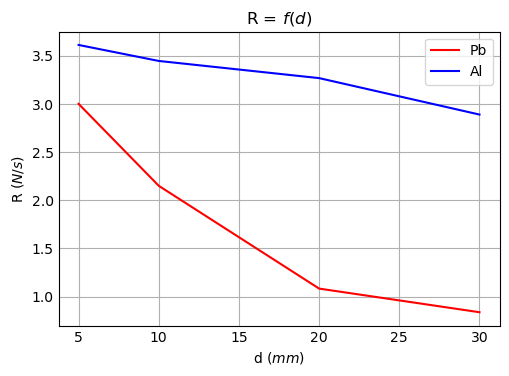

In [121]:
plt.style.use('_mpl-gallery')
plt.figure(figsize=(4.5, 3))


p1 = plt.plot(x, y1, color='r', label='Pb')
p2 = plt.plot(x, y2, color='b', label='Al')
plt.title("R = $f(d)$")
plt.ylabel("R $(N/s)$")
plt.xlabel("d $(mm)$")
plt.legend()

Text(20, 4, '$y = $0.0085$x + $3.6483')

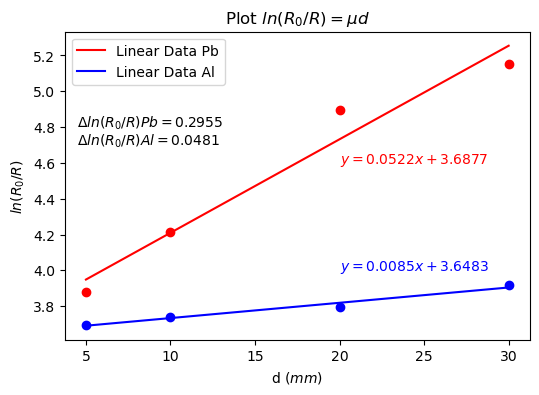

In [140]:
plt.style.use('default')
plt.figure(figsize=(6, 4))

n = len(x)

# Draw Scatter
s1 = plt.scatter(x, y1ln, color='r')
s2 = plt.scatter(x, y2ln, color='b')

# eernum Pb
S2_pb = sum((y1ln-np.mean(y1ln))**2) / (n-1)
S_pb = np.sqrt(S2_pb)
erpb = S_pb / (np.sqrt(n))


# eernum Al
S2_al = sum((y2ln-np.mean(y2ln))**2) / (n-1)
S_al = np.sqrt(S2_al)
eral = S_al / (np.sqrt(n))


x_smt = np.linspace(np.min(x), np.max(x), 1000)

# Poly Fit Pb
fpb = np.polyfit(x, y1ln, 1)
ypbf = fpb[0]*x_smt + fpb[1]
p1 = plt.plot(x_smt, ypbf, color='r', label='Linear Data Pb')

y_inpb = fpb[0]*x + fpb[1]
R2pb = 1 - (sum((y1ln-y_inpb)**2)) / (sum((y1ln-np.mean(y1ln))**2))


# Poly Fit Al
fal = np.polyfit(x, y2ln, 1)
yalf = fal[0]*x_smt + fal[1]
p2 = plt.plot(x_smt, yalf, color='b', label='Linear Data Al')

y_inal = fal[0]*x + fal[1]
R2pb = 1 - (sum((y2ln-y_inal)**2)) / (sum((y2ln-np.mean(y2ln))**2))


plt.title("Plot $ln(R_0/R) = \mu d$")
plt.ylabel("$ln(R_0/R)$")
plt.xlabel("d $(mm)$")
plt.legend()

plt.text(4.5,4.8,"$\Delta ln(R_0/R) Pb = $" + str(round(erpb,4)) )
plt.text(4.5,4.7,"$\Delta ln(R_0/R) Al = $" + str(round(eral,4)) )

plt.text(20,4.6, 
        "$y = $" + str(round(fpb[0],4)) + "$x + $" + str(round(fpb[1],4)),
        c='r')

plt.text(20,4, 
         "$y = $" + str(round(fal[0],4)) + "$x + $" + str(round(fal[1],4)),
        c='b')